# Assingment #3

## Part1 Implementing the Eigenvalue and Harris corner detectors (60 points):

Implement corner detectors based both on the minimum Eigenvalue and the Harrish measure. 

The corner detectors should be coded in a function called cornerDetect(img, winSize=7, type=0),

where the input arguments are

img = image # we are only doing grayscale images,

winSize = total size of window for summation in pixels,

type = {0 – Eigenvalue, 1 – Harris}

The function should return the corner strength as a numpy array that has the same size as your input image.

The steps the function has to do are:

1. Filter img with Sobel kernel to obtain derivatives Ix, Iy
2. For each pixel in img, determine second moment matrix H summed up over the window
3. Depending on type, either determine the minimum eigenvalue [using numpy functionality] OR the Harris corner measure and store in return array

Test your corner detector on this picture

https://users.fmrib.ox.ac.uk/~steve/susan/susan/img74.gif

[Read this with matplotlib! Depending on your installation of matplotlib, you will need to convert this to PNG first, since some installations can only read PNG. Again, do NOT use OpenCV!]

Test the picture with window sizes (3,5,7,9,11,15,21) for both types of corner measures and TIME the speed. For each window size, plot the output of the corner measures in a nice way like shown during class. Plot the overall speed comparing the two measures in another plot.


In the ipython notebook, answer the following questions:

1. At which window sizes can you detect all “meaningful” corners?
2. Which method is faster – Eigenvalue or Harris? By how much?

In [25]:
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import time
import numpy as np # this is the only math-ish library,
from PIL import Image
import urllib

%matplotlib inline

$$\begin{align*}
E(u,v)&=\sum_{(x,y)\in W}[I(x+u,y+v)-I(x,y)]^2 \\
&\approx \sum_{(x,y)\in W}[I(x,y)+I_xu+I_yv-I(x,y)^2] \\
&\approx \sum_{(x,y)\in W}[I_Xu+I_yv]^2 \\
&\approx Au^2+2Buv+Cv^2 \\ 
&\approx \begin{bmatrix}
 u&v
\end{bmatrix}
\begin{bmatrix}
A & B\\ 
B & C
\end{bmatrix}
\begin{bmatrix}
 u \\ 
 v 
\end{bmatrix}
\end{align*}$$

$$A=\sum_{(x,y)\in W}I_x^2 \;\;\;\; B=\sum_{(x,y)\in W}I_xI_y \;\;\;\; C=\sum_{(x,y)\in W}I_y^2$$

In [3]:
def cornerDetect(img, winSize=7, type=0):
    if type==0:
        
    elif type==1:
        
    else:
        print('type error')
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-3-56db54015241>, line 3)

In [12]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [4]:
prof = 'https://users.fmrib.ox.ac.uk/~steve/susan/susan/img74.gif'
urllib.request.urlretrieve(prof,'img74.gif')

gif='img74'
img = Image.open(gif+'.gif')
img.save(gif+".png",'png')

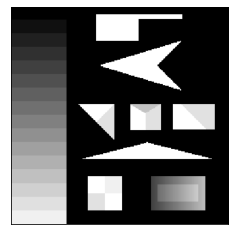

In [9]:
img = mpl.image.imread('img74.png')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
img.shape

(369, 369, 4)

In [13]:
mrimg = rgb2gray(img)

In [14]:
# filter size list
n_lst = [3, 5, 7, 9, 11, 15, 21]

In [16]:
imgdy = np.diff(mrimg, 1, 0)
imgdy = np.vstack((np.zeros((1, imgdy.shape[1])), imgdy))
imgdx = np.diff(mrimg, 1, 1)
imgdx = np.hstack((np.zeros((imgdx.shape[0],1)),imgdx))

<function matplotlib.pyplot.show(close=None, block=None)>

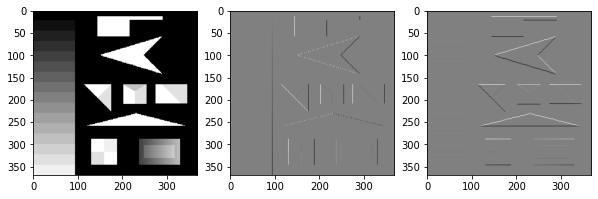

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(mrimg,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(imgdx,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(imgdy,cmap='gray')
plt.show

In [98]:
def convolution(img, weights):
    weights = weights.astype(float)
    filtered = np.zeros_like(img)
    width = int((weights.shape[1]-1)/2)
    height = int((weights.shape[0]-1)/2)
    for i in range(height,img.shape[1]-height):
        for j in range(width,img.shape[0]-width):
            filtered[j,i]=np.sum(weights*img[j-width:j+width+1,i-height:i+height+1])
    return(filtered)

def cornerDetect(img, winSize=7, type=0):
    filter_sobelx = np.array([
        (-1,0,1),
        (-2,0,2),
        (-1,0,1)
    ])
    filter_sobely = np.array([
        (-1,-2,-1),
        (0,0,0),
        (1,2,1)
    ])
    imgdx = convolution(img, 1/8*filter_sobelx)
    imgdy = convolution(img, 1/8*filter_sobely)
    l1 = np.zeros_like(img)
    l2 = np.zeros_like(img)
    h = np.zeros_like(img)
    ix2 = imgdx*imgdx
    iy2 = imgdy*imgdy
    ixy = imgdx*imgdy
    for y in range(0+winSize, img.shape[0]-1-winSize):
        for x in range(0+winSize, img.shape[1]-1-winSize):
            sx2 = np.sum(ix2[y-winSize:y+winSize, x-winSize:x+winSize])
            sy2 = np.sum(iy2[y-winSize:y+winSize, x-winSize:x+winSize])
            sxy = np.sum(ixy[y-winSize:y+winSize, x-winSize:x+winSize])
            tmpH = np.array([(sx2,sxy), (sxy,sy2)])
            l1[y,x], l2[y,x] = np.sort(np.linalg.eigvals(tmpH))
            ttmp = np.trace(tmpH)
            if ttmp != 0:
                h[y,x] = np.linalg.det(tmpH)/ttmp
            
    threshold = 2
    if type == 0:
        corner = l1 > threshold
    elif type == 1:
        corner = h > threshold
    else:
        print('type error')
            
    return corner
                         

In [99]:
h = cornerDetect(mrimg, winSize=7, type=0)

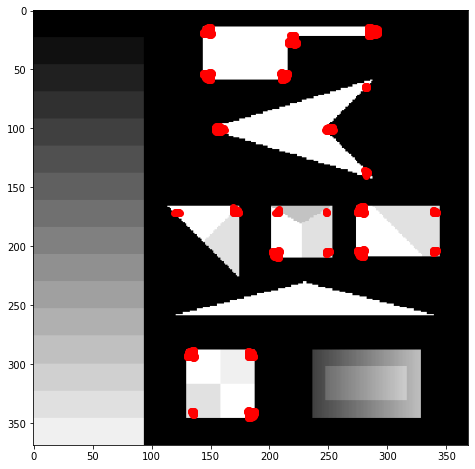

In [101]:
plt.figure(figsize=(10, 8))
plt.imshow(mrimg, cmap='gray')
cor_x = np.argwhere(h==True)[:,1]
cor_y = np.argwhere(h==True)[:,0]
plt.scatter(cor_x, cor_y, color='red')

### Q1. At which window sizes can you detect all "meaningful" corners?

### Q2. Which method is faster - Eigenvalue or Harris? By how much?

---

## Bonus

Bonus (10 points): Extend the cornerDetect function such that it works with color images – note that it should NOT create three images, but still only one corner value, but now taking into account all three color channels. Insert the code as a function cornerDetectColor and plot the results for this picture:

https://miro.medium.com/max/700/1*KvDEGIpfwdJtUFwB5acYEA.png

---